<a href="https://www.kaggle.com/code/filipkin/starter?scriptVersionId=204144828" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install feature_engine

Looking in links: /kaggle/input/pm-68105865-at-10-29-2024-15-48-56/


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import missingno as msno
import matplotlib.pyplot as plt
import re
import scipy as sc
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from feature_engine.imputation import CategoricalImputer


In [3]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv", dtype={'id': 'Int64'})

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [6]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [8]:
df.shape

(3482, 30)

In [9]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [10]:
df[df['area'].isna()]



,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
131,1612263424-1676,https://www.otodom.pl/wynajem/mieszkanie/warsz...,50 m²\n \n ...,https://www.otodom.pl/pl/oferta/powisle-gornos...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def extract_number(text):
    match = re.search(r'(\d+)', text)
    return float(match.group(0)) if match else None
df.loc[df['area'].isna(), 'area'] = df.loc[df['area'].isna(), 'offer_url'].apply(lambda x: extract_number(x) if isinstance(x, str) else None)



In [12]:
df[df['area'].isna()]

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href


In [13]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     3481 non-null   object
 1   net_price    3481 non-null   object
 2   deposit      3146 non-null   object
 3   area         3482 non-null   object
 4   room_num     3481 non-null   object
 5   build_type   3339 non-null   object
 6   floor        3401 non-null   object
 7   total_floor  3045 non-null   object
 8   build_mat    2239 non-null   object
 9   windows      2899 non-null   object
 10  heating      2998 non-null   object
 11  year_built   2468 non-null   object
 12  status       3191 non-null   object
 13  agd          3435 non-null   object
 14  security     3392 non-null   object
 15  add_info     3190 non-null   object
 16  rest_info    2012 non-null   object
 17  add_cost     1915 non-null   object
dtypes: object(18)
memory usage: 489.8+ KB


In [15]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [16]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [17]:
columns_to_clean1 = ["build_type","status","heating","windows","build_mat"]
df[columns_to_clean1] = df[columns_to_clean1].astype(str)
for col in columns_to_clean1:
    df[col] = df[col].str.split(pat=":", expand=True)[1]  # Keep only the second part

In [18]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,miejskie,2020,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,miejskie,1984,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,miejskie,2005,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,miejskie,1938,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,apartamentowiec,3,7,None,None,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350
3478,Wilanów,3300,3000,50,2,blok,1,2,cegła,plastikowe,miejskie,2006,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN
3479,Praga-Południe,2500,2500,4666,2,apartamentowiec,5,5,cegła,plastikowe,miejskie,2015,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN
3480,Praga-Północ,1300,1700,23,1,kamienica,,4,cegła,drewniane,kotłownia,1938,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270


In [19]:

columns_to_convert = ["net_price", "area","deposit","room_num","floor","total_floor","year_built","add_cost"]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     3481 non-null   object 
 1   net_price    3481 non-null   float64
 2   deposit      3146 non-null   float64
 3   area         3481 non-null   float64
 4   room_num     3481 non-null   float64
 5   build_type   3339 non-null   object 
 6   floor        3060 non-null   float64
 7   total_floor  3045 non-null   float64
 8   build_mat    2239 non-null   object 
 9   windows      2899 non-null   object 
 10  heating      2998 non-null   object 
 11  year_built   2468 non-null   float64
 12  status       3191 non-null   object 
 13  agd          3435 non-null   object 
 14  security     3392 non-null   object 
 15  add_info     3190 non-null   object 
 16  rest_info    2012 non-null   object 
 17  add_cost     1915 non-null   float64
dtypes: float64(8), object(10)
memory usage: 489.8+ K

In [21]:
cat_col_to_impute = ['location', 'build_type',"build_mat","windows","heating","status","add_info","rest_info","security","agd"]
catimp = CategoricalImputer(imputation_method="frequent")
imputed_df = catimp.fit_transform(df[cat_col_to_impute])
df[cat_col_to_impute] = imputed_df

In [22]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost
0,Włochy,2100.0,2100.0,37.0,2.0,blok,NaN,4.0,cegła,plastikowe,miejskie,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,miejskie,2020.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350.0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,miejskie,1984.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1.0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,miejskie,2005.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,wynajmę również studentom,NaN
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,miejskie,1938.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,wynajmę również studentom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000.0,2500.0,45.0,1.0,apartamentowiec,3.0,7.0,cegła,plastikowe,miejskie,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350.0
3478,Wilanów,3300.0,3000.0,50.0,2.0,blok,1.0,2.0,cegła,plastikowe,miejskie,2006.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN
3479,Praga-Południe,2500.0,2500.0,4666.0,2.0,apartamentowiec,5.0,5.0,cegła,plastikowe,miejskie,2015.0,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN
3480,Praga-Północ,1300.0,1700.0,23.0,1.0,kamienica,NaN,4.0,cegła,drewniane,kotłownia,1938.0,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270.0


In [23]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100.0,2100.0,37.0,2.0,blok,NaN,4.0,cegła,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0


In [24]:
df["add_info"].unique()

array([''], dtype=object)

In [25]:
df["rest_info"].unique()


array([''], dtype=object)

In [26]:
df["security"].unique()

array(['', '/'], dtype=object)

In [27]:
df["agd"].unique()

array(['', '/'], dtype=object)

In [28]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [29]:
columns_to_clean = [df.columns]
for col in columns_to_clean:
    df[col] = df[col].replace(['', '/'], pd.NA)

In [30]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100.0,2100.0,37.0,2.0,blok,NaN,4.0,cegła,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825.0,3400.0,38.0,2.0,blok,NaN,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300.0,3300.0,57.0,3.0,blok,NaN,15.0,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200.0,NaN,63.0,2.0,blok,4.0,5.0,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000.0,3000.0,65.0,3.0,kamienica,3.0,4.0,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000.0,2500.0,45.0,1.0,apartamentowiec,3.0,7.0,cegła,plastikowe,...,1,1,0,1,0,1,0,0,0,0
3478,Wilanów,3300.0,3000.0,50.0,2.0,blok,1.0,2.0,cegła,plastikowe,...,1,1,1,0,1,0,1,0,0,0
3479,Praga-Południe,2500.0,2500.0,4666.0,2.0,apartamentowiec,5.0,5.0,cegła,plastikowe,...,1,1,0,1,1,1,1,0,0,0
3480,Praga-Północ,1300.0,1700.0,23.0,1.0,kamienica,NaN,4.0,cegła,drewniane,...,0,0,1,0,0,0,0,0,0,0


In [31]:
imputer = KNNImputer(n_neighbors=3)

In [32]:
# List of categorical columns to encode
cat_col_to_enc = ['location', 'build_type', 'build_mat', 'windows', 'heating', 'status']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for a dense array output

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[cat_col_to_enc])

# Create a DataFrame for the encoded data with meaningful column names
encoded_columns = encoder.get_feature_names_out(cat_col_to_enc)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Drop the original categorical columns
df = df.drop(columns=cat_col_to_enc)

# Concatenate the original DataFrame (without the categorical columns) with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [33]:
df["location_Mokotów"]

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3477    0.0
3478    0.0
3479    0.0
3480    0.0
3481    0.0
Name: location_Mokotów, Length: 3482, dtype: float64

In [34]:
df_imp_final = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [35]:
df_imp_final.head(10)

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
0,2100.0,2100.000000,37.0,2.0,1.666667,4.0,2002.666667,400.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1825.0,3400.000000,38.0,2.0,1.333333,8.0,2020.000000,350.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3300.0,3300.000000,57.0,3.0,6.333333,15.0,1984.000000,1.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2200.0,3133.333333,63.0,2.0,4.000000,5.0,2005.000000,516.666667,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3000.0,3000.000000,65.0,3.0,3.000000,4.0,1938.000000,616.666667,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,2600.0,2600.000000,50.0,2.0,1.000000,3.0,1957.000000,38022.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1600.0,1000.000000,31.0,1.0,5.000000,7.0,1975.333333,268.333333,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1800.0,1800.000000,20.0,1.0,2.000000,4.0,2000.000000,100.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,3700.0,6500.000000,90.0,3.0,8.000000,8.0,2020.000000,1000.000000,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,2200.0,3000.000000,79.0,3.0,1.000000,3.0,2004.000000,800.000000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
df_imp_final.isna().sum()

net_price                 0
deposit                   0
area                      0
room_num                  0
floor                     0
                         ..
heating_kotłownia         0
heating_miejskie          0
status_do remontu         0
status_do wykończenia     0
status_do zamieszkania    0
Length: 88, dtype: int64

In [37]:
df_imp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   net_price                                   3482 non-null   float64
 1   deposit                                     3482 non-null   float64
 2   area                                        3482 non-null   float64
 3   room_num                                    3482 non-null   float64
 4   floor                                       3482 non-null   float64
 5   total_floor                                 3482 non-null   float64
 6   year_built                                  3482 non-null   float64
 7   add_cost                                    3482 non-null   float64
 8   is_internet                                 3482 non-null   float64
 9   is_balkon                                   3482 non-null   float64
 10  is_piwnica  

In [38]:
df_imp_final.describe()

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
count,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,...,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,2350.420735,2702.224105,444.831419,1.988034,3.759334,6.576872,2009.903887,1296.275129,0.533027,0.678059,...,0.204193,0.785468,0.006318,0.031591,0.004595,0.019529,0.937967,0.000574,0.001723,0.997702
std,1089.556679,1475.474368,1374.549115,0.748636,2.465342,3.761275,413.085853,5299.609093,0.498980,0.467288,...,0.403169,0.410556,0.079247,0.174934,0.067641,0.138395,0.241251,0.023963,0.041481,0.047884
min,250.000000,1.000000,10.000000,1.000000,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1800.000000,2000.000000,36.000000,2.000000,2.000000,4.000000,1983.750000,300.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,2200.000000,2500.000000,45.000000,2.000000,3.000000,6.000000,2007.000000,416.666667,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2600.000000,3000.000000,57.000000,2.000000,5.000000,8.000000,2017.000000,550.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,22900.000000,22900.000000,16610.000000,7.000000,10.000000,54.000000,20202.000000,70245.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
round(df_imp_final["floor"], 0)

0       2.0
1       1.0
2       6.0
3       4.0
4       3.0
       ... 
3477    3.0
3478    1.0
3479    5.0
3480    4.0
3481    1.0
Name: floor, Length: 3482, dtype: float64

In [40]:
round(df_imp_final["year_built"], 0)

0       2003.0
1       2020.0
2       1984.0
3       2005.0
4       1938.0
         ...  
3477    2007.0
3478    2006.0
3479    2015.0
3480    1938.0
3481    1990.0
Name: year_built, Length: 3482, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='deposit', ylabel='Count'>

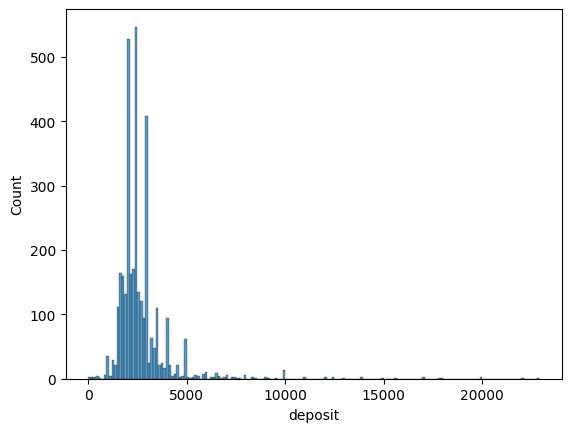

In [41]:
sns.histplot(data = df_imp_final, x = "deposit")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 30000.0)

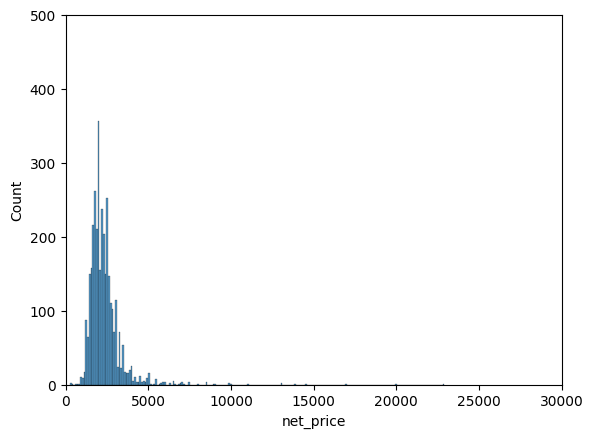

In [42]:
sns.histplot(data = df_imp_final, x = "net_price")
plt.ylim(0, 500)
plt.xlim(0,30000)

In [43]:
count_price = df_imp_final[df_imp_final['net_price'] > 5000].shape[0]


In [44]:
count_price

56

In [45]:
count_price_df = df_imp_final[df_imp_final['net_price'] > 5000]


In [46]:
print(count_price_df)

      net_price       deposit     area  room_num      floor  total_floor  \
12       6000.0   6000.000000    140.0       5.0   1.000000     1.000000   
51       5500.0   8500.000000    112.0       3.0   2.000000     4.000000   
72      22900.0  22900.000000    117.0       3.0  10.000000    54.000000   
175     20000.0  20000.000000    133.0       3.0  10.000000    54.000000   
183      5800.0  10000.000000   7180.0       2.0   4.000000    17.000000   
185      5200.0  10000.000000    101.0       3.0   3.000000    10.000000   
202      6299.0   6433.333333     36.0       2.0   8.000000     8.000000   
220      8500.0  17000.000000  16610.0       5.0   4.000000     5.000000   
333      6675.0  10000.000000    105.0       3.0   6.000000     7.000000   
393      5399.0   5399.000000   9713.0       4.0   3.000000     4.000000   
450     10000.0  13833.333333    127.0       4.0   6.000000     6.000000   
477      6000.0   6200.000000     93.0       4.0   1.000000     2.000000   
501      690

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 5000.0)

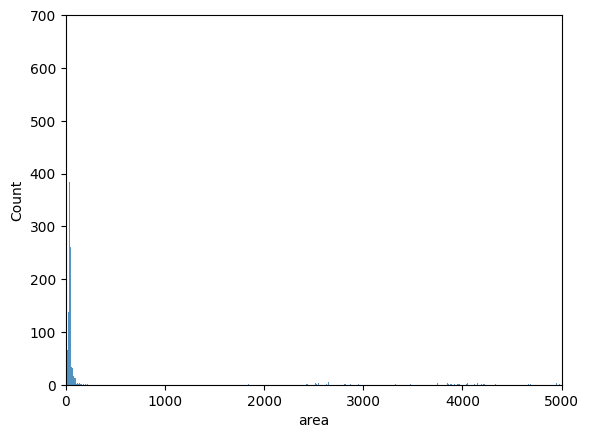

In [47]:
sns.histplot(data = df_imp_final, x = "area", stat = "count")
plt.ylim(0, 700)
plt.xlim(0,5000)

In [48]:
count = df_imp_final[df_imp_final['area'] > 1000].shape[0]


In [49]:
print(count)

309


In [50]:
df_imp_final[df_imp_final['area'] > 1000].head(10)

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,windows_drewniane,windows_plastikowe,heating_elektryczne,heating_gazowe,heating_inne,heating_kotłownia,heating_miejskie,status_do remontu,status_do wykończenia,status_do zamieszkania
38,1600.0,2200.0,3820.0,2.0,5.000000,6.0,1960.000000,600.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40,1500.0,2100.0,5050.0,2.0,7.000000,8.0,2003.000000,500.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
58,1750.0,2200.0,4213.0,2.0,2.333333,8.0,2017.000000,450.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
69,3000.0,3500.0,4650.0,2.0,5.000000,8.0,2020.000000,590.000000,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
74,2800.0,3000.0,6673.0,4.0,1.000000,3.0,2019.000000,800.000000,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
79,1800.0,1800.0,3050.0,2.0,10.000000,10.0,1968.333333,255.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
90,2300.0,2300.0,3840.0,2.0,1.000000,7.0,1967.000000,375.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
94,2700.0,2700.0,5360.0,2.0,3.000000,14.0,2012.000000,463.333333,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
98,2500.0,2500.0,6370.0,2.0,3.000000,7.0,2001.000000,550.000000,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
104,1850.0,1850.0,3610.0,1.0,4.000000,5.0,2002.000000,346.666667,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
count_both = df_imp_final[(df_imp_final['area'] > 1000) & (df_imp_final["net_price"] > 5000)].shape[0]


In [52]:
count_both

4